#### This project all about CNN which is the one type network in DL.we have taken the dataset which is already there in the 
#### tensorflow.keras.datasets (fashion_mnist). i have used this dataset to perform CNN

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# loading the dataset using tensorflow


In [60]:
from tensorflow.keras.datasets import fashion_mnist

In [61]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data() # loading the Data

#### we could able to Visualize the data once the data has beed loaded

## Visualize the data

In [62]:
X_train[0] # object is present when the pixel value is high

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [63]:
y_test.shape

(10000,)

#### Use matplotlib to view the image from the dataset

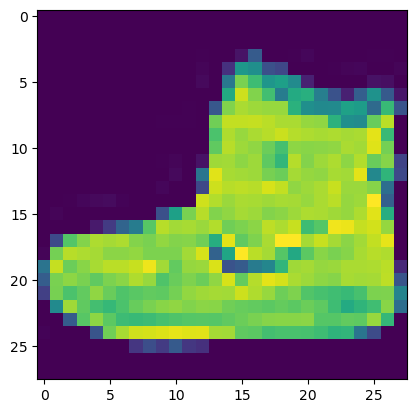

In [64]:
plt.imshow(X_train[0])

In [65]:
# we are done with the load dataset 
# now the 2nd step is preprocessing our data which means normalizing the our X_trian and X_test data
# by dividing by the max value of the image arrays.

# below we got the max value of image

In [66]:
X_train.max(),X_test.max()

(255, 255)

In [67]:
X_train=X_train/255


In [69]:
X_test=X_test/255
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [70]:
X_train.max()

1.0

In [71]:
X_train.shape,X_test.shape


((60000, 28, 28), (10000, 28, 28))

In [72]:
#Reshape the X arryas to include the 4 diemention of the single channel
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000, 28, 28,1)

#### Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras


<a>It allows the use of categorical variables in models that require numerical input. It can improve model performance by providing more information to the model about the categorical variable. It can help to avoid the problem of ordinality, which can occur when a categorical variable has a natural ordering</p>

In [73]:
from tensorflow.keras.utils import to_categorical

In [75]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [76]:
y_cat_train=to_categorical(y_train)
y_cat_test=to_categorical(y_test)

In [77]:
# now we almost done load data,visualize data,preprocessing or normalize data
# now we are ready to build our CNN model which is one of the DL algorithm

#formula is (W-F+1)=final output will come which is the input of another CNN 


In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPool2D

In [80]:
X_train.shape

(60000, 28, 28, 1)

In [81]:
model=Sequential()

#CNN layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

#Maxpooling layer
model.add(MaxPool2D(pool_size=(2,2)))


# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

#adding dense Layer
# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128,activation='relu'))
#model.add(Dropout()) we can add if you want

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10,activation='softmax'))


model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
        

In [83]:
# if you want know the model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

# Train our model
#### above the model hasbeen done ,now below we will be doing fit or train our model

In [84]:
model.fit(X_train,y_cat_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4134 - accuracy: 0.8531
Epoch 2/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2796 - accuracy: 0.8981
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2386 - accuracy: 0.9121
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2122 - accuracy: 0.9224
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1895 - accuracy: 0.9315
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1695 - accuracy: 0.9384
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1545 - accuracy: 0.9432
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1419 - accuracy: 0.9485
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1281 - accuracy: 0.9542
Epoch 10/10
1875/1875 [==============================] - 24s 13m

#### we will be performing the evaluate model once the trainig model donea

In [87]:
model.evaluate(X_test,y_cat_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3870 - accuracy: 0.8961


[0.386996328830719, 0.8960999846458435]

### classification_report

In [96]:
from sklearn.metrics import classification_report,confusion_matrix

### I am getting error while using model.predict_classes() to predict the values
### instead of that i am using np.argmax function use to model.predict() values

In [92]:

y_prediction=np.argmax(model.predict(X_test),axis=-1)


313/313 [==============================] - 1s 4ms/step


In [93]:
y_prediction

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [94]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.74      0.92      0.82      1000
           3       0.94      0.84      0.89      1000
           4       0.91      0.71      0.80      1000
           5       0.99      0.96      0.98      1000
           6       0.69      0.74      0.72      1000
           7       0.95      0.98      0.97      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [97]:
print(confusion_matrix(y_test,y_prediction))

[[869   0  35   8   2   1  80   0   5   0]
 [  1 979   2   8   1   0   6   0   3   0]
 [  9   0 922   3  16   0  50   0   0   0]
 [ 21   7  19 836  20   1  93   0   2   1]
 [  0   0 169  18 715   0  97   0   1   0]
 [  0   0   0   0   0 963   0  24   2  11]
 [106   0  97  12  30   0 743   0  12   0]
 [  0   0   0   0   0   0   0 982   0  18]
 [  3   0   6   0   1   2   5   2 981   0]
 [  0   0   0   0   0   4   0  24   1 971]]


In [99]:
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix Heatmap')

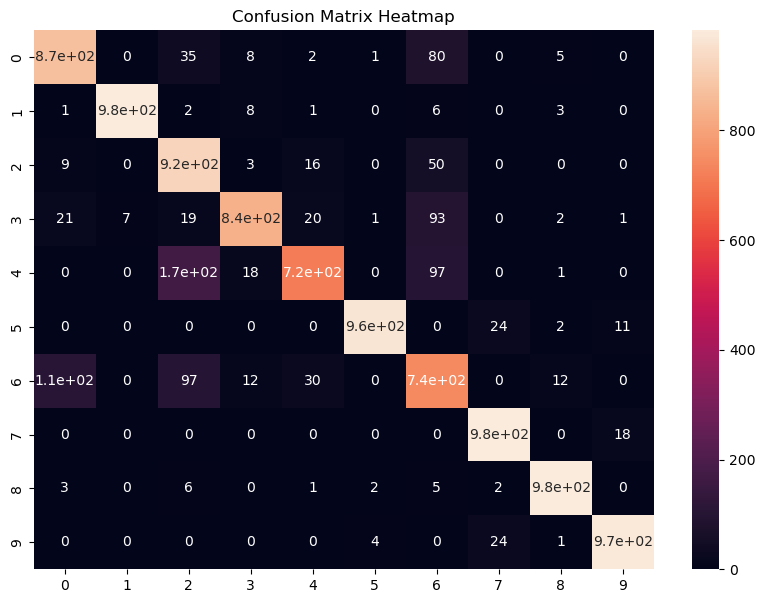

In [103]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_prediction),annot=True)
plt.title('Confusion Matrix Heatmap')

## Yeah Done:) 
  ###### karuppasamy V

#### Using EarlyStopping method

In [104]:
from tensorflow.keras.callbacks import EarlyStopping

In [106]:
model=Sequential()

#CNN layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

#Maxpooling layer
model.add(MaxPool2D(pool_size=(2,2)))


# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

#adding dense Layer
# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128,activation='relu'))
#model.add(Dropout()) we can add if you want

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10,activation='softmax'))


model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
        

In [105]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [107]:
model.fit(X_train,y_cat_train,epochs=10,verbose=2,validation_data=(X_test,y_cat_test),callbacks=[early_stop] )

Epoch 1/10
1875/1875 - 21s - loss: 0.4074 - accuracy: 0.8545 - val_loss: 0.3401 - val_accuracy: 0.8818 - 21s/epoch - 11ms/step
Epoch 2/10
1875/1875 - 21s - loss: 0.2778 - accuracy: 0.8997 - val_loss: 0.3019 - val_accuracy: 0.8919 - 21s/epoch - 11ms/step
Epoch 3/10
1875/1875 - 20s - loss: 0.2371 - accuracy: 0.9133 - val_loss: 0.2842 - val_accuracy: 0.9001 - 20s/epoch - 11ms/step
Epoch 4/10
1875/1875 - 26s - loss: 0.2090 - accuracy: 0.9244 - val_loss: 0.2746 - val_accuracy: 0.8960 - 26s/epoch - 14ms/step
Epoch 5/10
1875/1875 - 28s - loss: 0.1883 - accuracy: 0.9316 - val_loss: 0.2732 - val_accuracy: 0.9038 - 28s/epoch - 15ms/step
Epoch 6/10
1875/1875 - 26s - loss: 0.1700 - accuracy: 0.9374 - val_loss: 0.2832 - val_accuracy: 0.9078 - 26s/epoch - 14ms/step


In [108]:
val_loss=pd.DataFrame(model.history.history)
val_loss

,loss,accuracy,val_loss,val_accuracy
0,0.407444,0.854500,0.340053,0.8818
1,0.277773,0.899700,0.301938,0.8919
2,0.237083,0.913300,0.284181,0.9001
3,0.209010,0.924417,0.274604,0.8960
4,0.188294,0.931650,0.273224,0.9038
5,0.170020,0.937417,0.283224,0.9078


In [ ]:
# validation_loss

<Axes: >

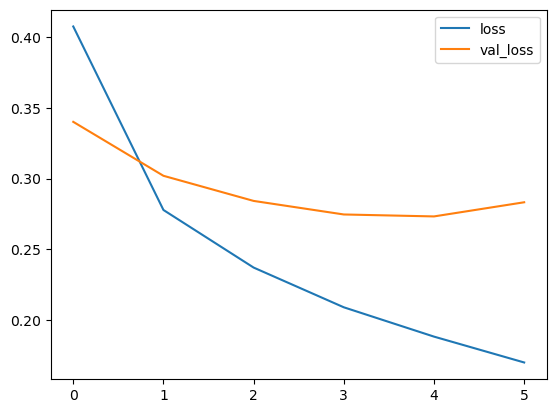

In [109]:
val_loss[['loss','val_loss']].plot()

<Axes: >

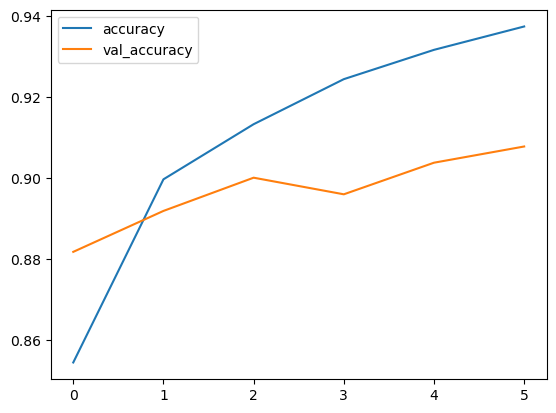

In [110]:
# Accuracy 
val_loss[['accuracy','val_accuracy']].plot()

In [111]:
# Importtent point

<h2>Batch size</h2>

<h4>Batch_size=20 Like this</h4>

<p>In deep learning, batch size is the number of training examples used in one iteration of training. The batch size affects the number of samples used in one iteration and the number of iterations needed to complete one epoch3. The larger the batch size, the more time it will take to train the model. However, a larger batch size can also lead to better results1. The batch size is one of the most important hyperparameters to tune when training deep learning models  </p>
<h2>Verbose</h2>
<h4>refer below page<h4>
<a>https://stackoverflow.com/questions/47902295/what-is-the-use-of-verbose-in-keras-while-validating-the-model</a>
<p> 0 means dont show while training</p>
<p> 1 means it shows like animated progress bar like this: [====================]</p>
<p> 2 means verbose=2 will just mention the number of epoch like this: Epoch = 1/10</p>
<p> verbose: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.</p>

 
